## **Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **DataFrame**

In [2]:
df = pd.read_csv(
 'https://raw.githubusercontent.com/andre-marcos-perez/' + \
 'ebac-course-utils/develop/dataset/credito.csv',
 na_values='na'
)

## **Visualização do DF**

In [3]:
df.head(10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


## **Tipos de Dados**

In [4]:
df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


## **Dados Faltantes**

In [5]:
df.isna().any()

,0
id,False
default,False
idade,False
sexo,False
dependentes,False
escolaridade,True
estado_civil,True
salario_anual,True
tipo_cartao,False
meses_de_relacionamento,False


## **Estatísticas de dados Faltantes**

In [6]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col:
        {
          'quantidade': qtd,
          "porcentagem": round(100 * qtd/total, 2)
        }
      }
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [7]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [8]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [9]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## **Dimensões do Objeto**

In [10]:
df.shape

(10127, 16)

In [11]:
df[df['default'] == 0].shape

(8500, 16)

In [12]:
df[df['default'] == 1].shape

(1627, 16)

In [13]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [14]:
print(f"A proporcão clientes adimplentes é de " + \
 f"{round(100 * qtd_adimplentes / qtd_total, 2)}%"
 )
print(f"A proporcão clientes inadimplentes é de " + \
 f"{round(100 * qtd_inadimplentes / qtd_total, 2)}%"
 )

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


## **Atributos Categóricos**

In [15]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


## **Atributos Numéricos**

In [16]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


## **Transformação e Limpeza De Dados:**

In [17]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

,0
limite_credito,object
valor_transacoes_12m,object


In [18]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


## **Função Lambda Para Limpar Dados**

In [19]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))
valores_originais = [
 '12.691,51',
 '8.256,96',
 '3.418,56',
 '3.313,03',
 '4.716,22'
]

valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


## **Aplicar nas Colunas de Interesse**

In [20]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

## **Tipos de Dados**

In [21]:
df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


## **Estatísticas Descritivas das Colunas**

In [22]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


## **Estatísticas Descritivas das Colunas Numéricas**

In [23]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


## **Remover Linhas com Qualquer Valor Faltante**

In [24]:
df.dropna(inplace=True)

## **Verificação Para Ver se Tem Dados Faltantes**

In [25]:
df.isna().any()

,0
id,False
default,False
idade,False
sexo,False
dependentes,False
escolaridade,False
estado_civil,False
salario_anual,False
tipo_cartao,False
meses_de_relacionamento,False


## **Filtrar DataFrames**

In [26]:
df_adimplente = df[df['default'] == 0]

In [27]:
df_inadimplente = df[df['default'] == 1]

In [28]:
df_to_plot = df[df['default'] == 2]

## **Visualização De Dados**

In [29]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


## **Escolaridade**

In [30]:
df_to_plot.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m


<ipython-input-31-c83fe55c7df3>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-31-c83fe55c7df3>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  eixos[eixo].set_xticklabels(eixos[eixo].get_xticklabels(), rotation=90)
<ipython-input-31-c83fe55c7df3>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-31-c83fe55c7df3>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  eixos[eixo].set_xticklabels(eixos[eixo].get_xticklabels(), rotation=90)
<ipython-input-31-c83fe55c7df3>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

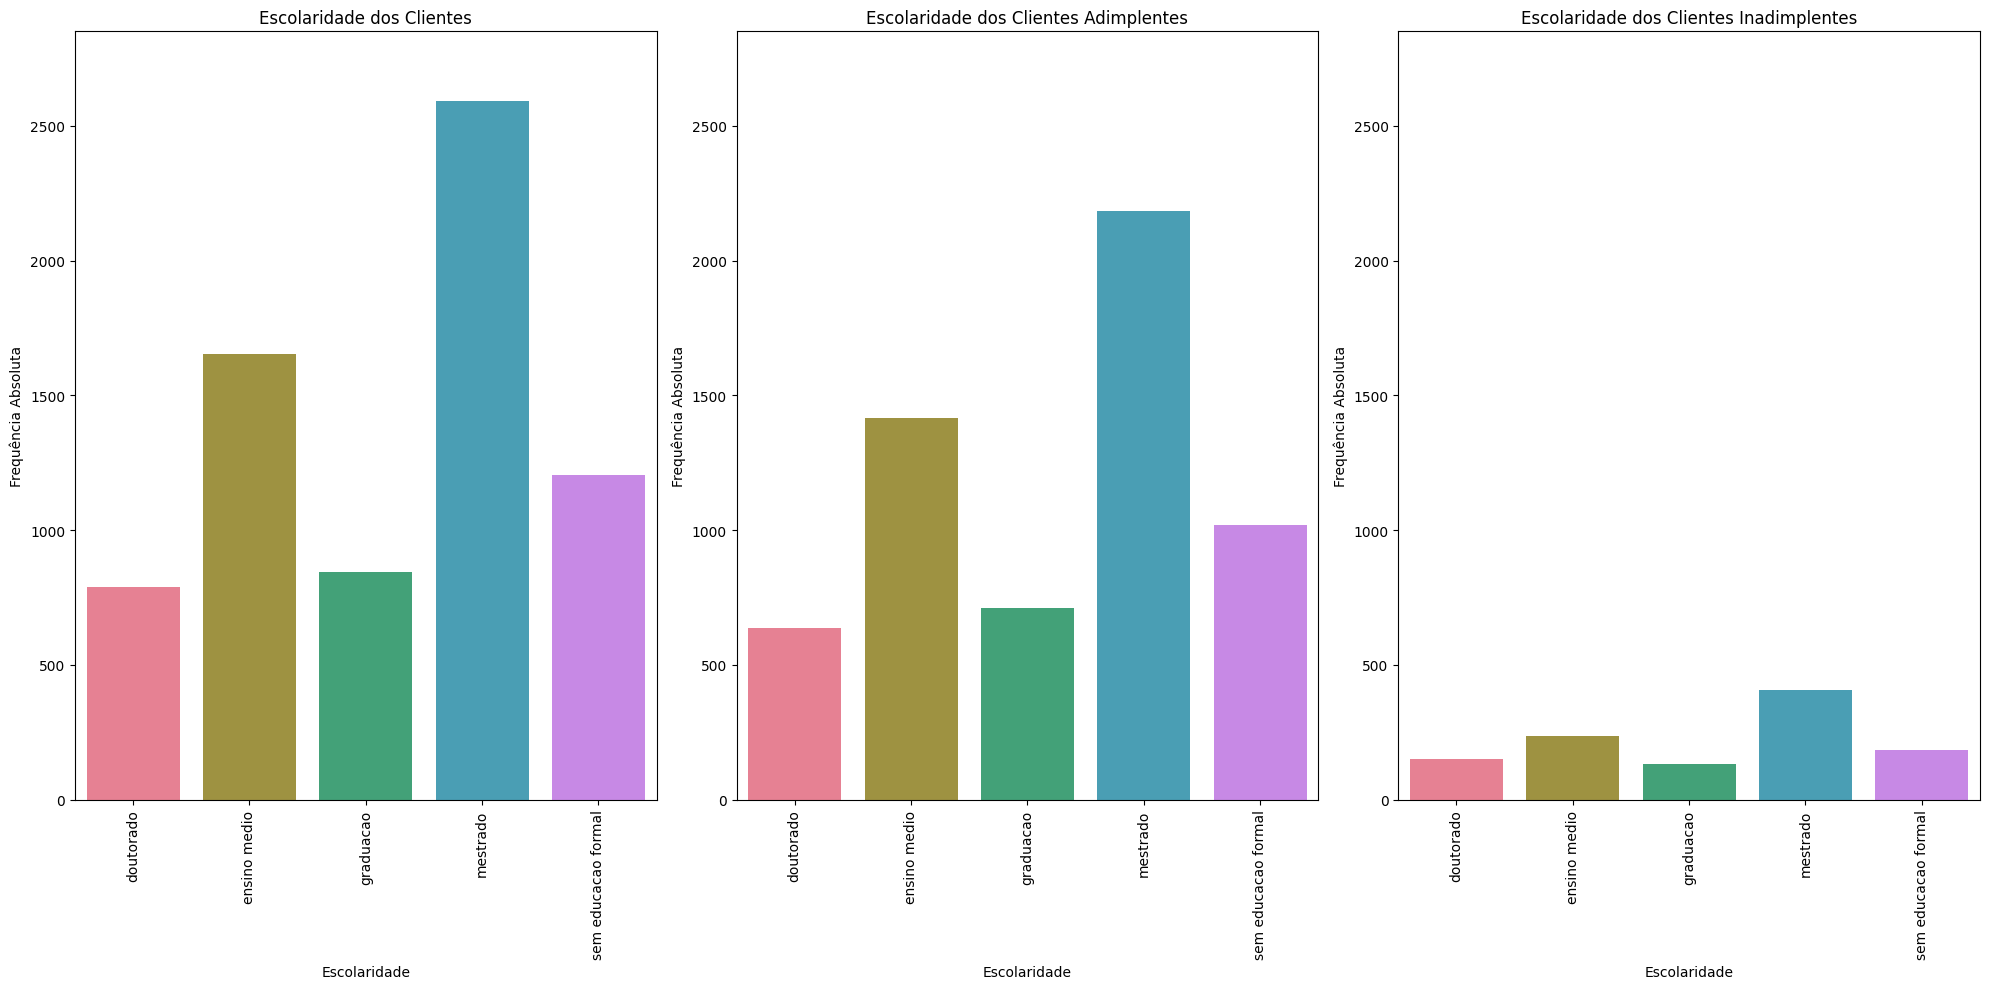

In [31]:
# Definindo a coluna de interesse e os títulos dos gráficos
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

# Variáveis auxiliares para controlar o eixo Y máximo
max_y = 0
max_frequencia = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

# Criar a figura e os subplots (3 gráficos lado a lado)
figura, eixos = plt.subplots(1, 3, figsize=(20, 10), sharex=True)

# Iterar sobre os DataFrames para todos os clientes, clientes adimplentes e inadimplentes
for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):

    # Calcular contagem de valores para a coluna 'escolaridade' e resetar o índice
    df_to_plot = dataframe[coluna].value_counts().reset_index()

    # Renomear as colunas para 'escolaridade_values' e 'frequencia_absoluta'
    df_to_plot.columns = ['escolaridade_values', 'frequencia_absoluta']

    # Ordenar o DataFrame pelas categorias da escolaridade
    df_to_plot.sort_values(by=['escolaridade_values'], inplace=True)

    # Gerar uma paleta de cores com o número de barras que você tem
    num_barras = df_to_plot.shape[0]
    paleta = sns.color_palette("husl", num_barras)  # Você pode escolher outro tipo de paleta se preferir

    # Plotar o gráfico de barras usando Seaborn
    sns.barplot(
        x='escolaridade_values',
        y='frequencia_absoluta',
        data=df_to_plot,
        ax=eixos[eixo],
        palette=paleta  # Aplicar a paleta de cores
    )

    # Configurar o título e os rótulos dos eixos
    eixos[eixo].set_title(titulos[eixo])  # This line and the following ones were likely misaligned
    eixos[eixo].set_xlabel(coluna.capitalize())
    eixos[eixo].set_ylabel('Frequência Absoluta')

    # Rotacionar os rótulos do eixo X em 90 graus
    eixos[eixo].set_xticklabels(eixos[eixo].get_xticklabels(), rotation=90)

    # Ajustar o eixo Y para ter o mesmo limite máximo entre todos os gráficos
    eixos[eixo].set_ylim(0, max_frequencia)

# Ajustar layout para evitar sobreposição de elementos
plt.tight_layout()

# Exibir a figura com os três gráficos
plt.show()

## **Salário Anual**

<ipython-input-32-c7a8a7dcbd1f>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.barplot(
<ipython-input-32-c7a8a7dcbd1f>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(f.get_xticklabels(), rotation=90) # This line and the following ones were indented by one extra space. Fixed by removing the extra space.
<ipython-input-32-c7a8a7dcbd1f>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.barplot(
<ipython-input-32-c7a8a7dcbd1f>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(f.get_xticklabels(), rotation=90) # This line and the following ones were indented by one extra space. Fixed by removing the

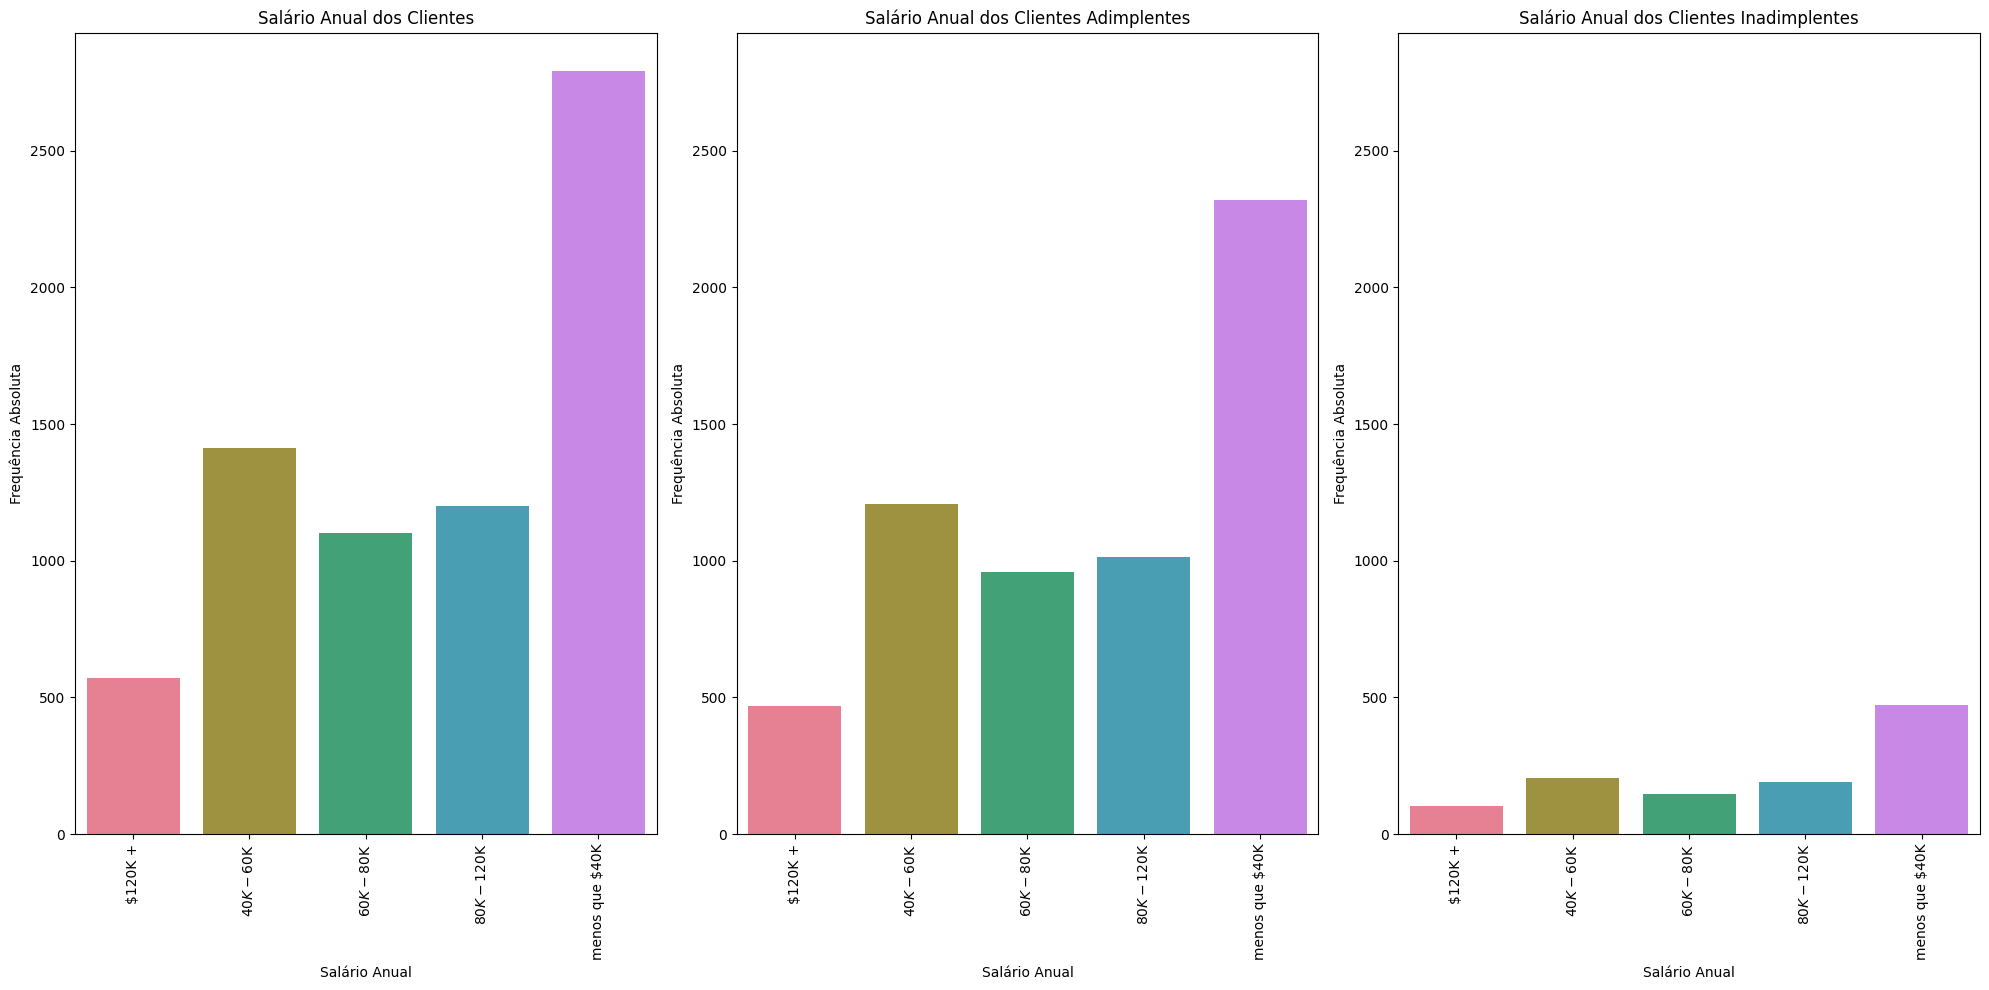

In [32]:
# Definindo a coluna de interesse e os títulos dos gráficos
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

# Variável para controlar o eixo Y máximo
max_y = 0

# Criar a figura e os subplots (3 gráficos lado a lado)
figura, eixos = plt.subplots(1, 3, figsize=(20, 10), sharex=True)

# Iterar sobre os DataFrames para todos os clientes, clientes adimplentes e inadimplentes
for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):

    # Calcular a contagem de valores para a coluna 'salario_anual'
    df_to_plot = dataframe[coluna].value_counts().to_frame()

    # Corrija a renomeação para direcionar a coluna correta 0 (coluna padrão para uma única coluna df)
    df_to_plot.rename(columns={df_to_plot.columns[0]: 'frequencia_absoluta'}, inplace=True)

    # Criar uma nova coluna 'salario_anual' a partir do índice
    df_to_plot[coluna] = df_to_plot.index

    # Resetar o índice
    df_to_plot.reset_index(drop=True, inplace=True)

    # Ordenar o DataFrame pela coluna 'salario_anual'
    df_to_plot.sort_values(by=[coluna], inplace=True)

    # Gerar uma paleta de cores com o número de barras que você tem
    num_barras = df_to_plot.shape[0]
    paleta = sns.color_palette("husl", num_barras)  # Você pode escolher outro tipo de paleta se preferir

    # Criar o gráfico de barras com Seaborn
    f = sns.barplot(
    x=coluna,
    y='frequencia_absoluta',
    data=df_to_plot,
    ax=eixos[eixo],
    palette=paleta  # Aplicar a paleta de cores
   )

    # Configurar o título e rótulos dos eixos
    f.set(title=titulos[eixo], xlabel='Salário Anual', ylabel='Frequência Absoluta')

    # Rotacionar os rótulos do eixo X em 90 graus para melhor visualização
    f.set_xticklabels(f.get_xticklabels(), rotation=90) # This line and the following ones were indented by one extra space. Fixed by removing the extra space.

    # Ajustar o eixo Y para ter o mesmo limite máximo entre todos os gráficos
    _, max_y_f = f.get_ylim()
    max_y = max(max_y_f, max_y)
    f.set(ylim=(0, max_y))

# Ajustar layout para evitar sobreposição de elementos
plt.tight_layout()

# Exibir a figura com os três gráficos
plt.show()

## **Visualizações Numericas**

In [33]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


## **Quantidade De Transações do Ultimos 12 Meses**

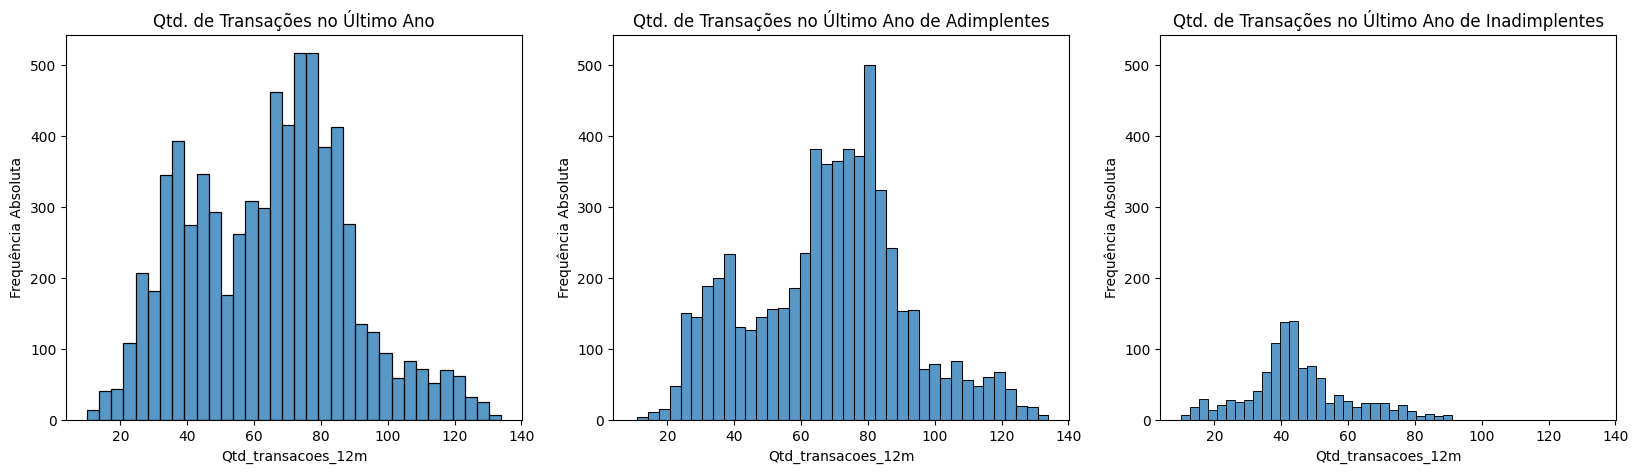

In [34]:
coluna = 'qtd_transacoes_12m'
titulos = [
 'Qtd. de Transações no Último Ano',
 'Qtd. de Transações no Último Ano de Adimplentes',
 'Qtd. de Transações no Último Ano de Inadimplentes'
]
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
 f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
 f.set(
 title=titulos[eixo],
 xlabel=coluna.capitalize(),
 ylabel='Frequência Absoluta'
 )
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))
 eixo += 1
figura.show()

## **Valor Das Transações dos ultimos 12 Meses**

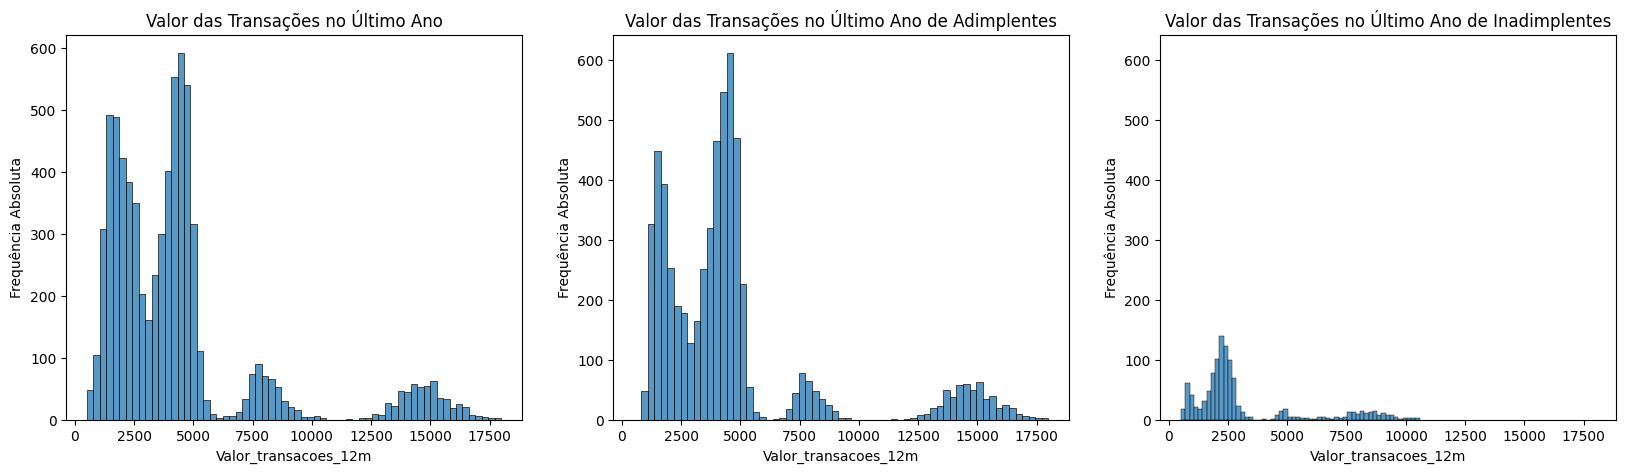

In [35]:
coluna = 'valor_transacoes_12m'
titulos = [
 'Valor das Transações no Último Ano',
 'Valor das Transações no Último Ano de Adimplentes',
 'Valor das Transações no Último Ano de Inadimplentes'
]
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
 f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
 f.set(
 title=titulos[eixo],
 xlabel=coluna.capitalize(),
 ylabel='Frequência Absoluta'
 )
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))
 eixo += 1
figura.show()

## **Valor De Transações X Quantidades de Transações**

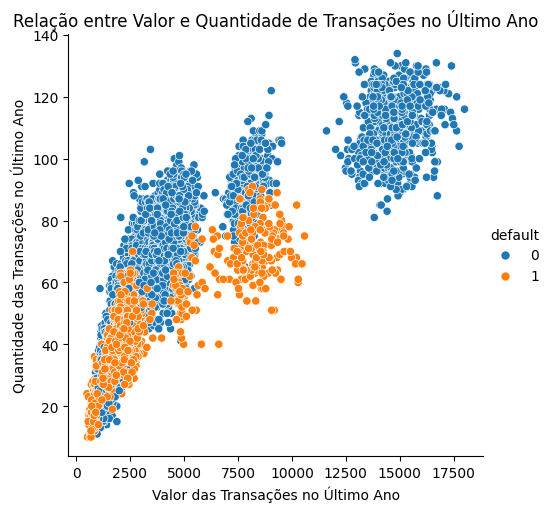

In [36]:
f = sns.relplot(
 x='valor_transacoes_12m',
 y='qtd_transacoes_12m',
 data=df,
 hue='default'
)
_ = f.set(
 title='Relação entre Valor e Quantidade de Transações no Último Ano',
 xlabel='Valor das Transações no Último Ano',
 ylabel='Quantidade das Transações no Último Ano'
 )

## **Média entre o Sexo Masculino x Feminino**

In [38]:
# Converter as colunas 'coluna1' e 'coluna2' de object para float
sexo_mapping = {'M': 0, 'F': 1}  # Defina o mapeamento desejado
df['sexo'] = df['sexo'].map(sexo_mapping)

# Remova cifrões, 'K' e espaços e lide com os intervalos calculando a média
def clean_salary(salary_str):
    try:
        # Remova '$', 'K' e espaços; dividir se for um intervalo
        salary_str = salary_str.replace('$', '').replace('K', '').replace(' ', '')
        if '-' in salary_str:
            lower, upper = map(float, salary_str.split('-'))
            return (lower + upper) / 2  # Pegue a média do intervalo
        else:
            return float(salary_str)
    except (ValueError, TypeError):
        return float('nan')  # Tratar entradas inválidas como NaN

df['salario_anual'] = df['salario_anual'].apply(clean_salary)

<ipython-input-46-94d4fea52876>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  eixos[eixo].set_xticklabels(eixos[eixo].get_xticklabels(), rotation=20)
<ipython-input-46-94d4fea52876>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  eixos[eixo].set_xticklabels(eixos[eixo].get_xticklabels(), rotation=20)
<ipython-input-46-94d4fea52876>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  eixos[eixo].set_xticklabels(eixos[eixo].get_xticklabels(), rotation=20)


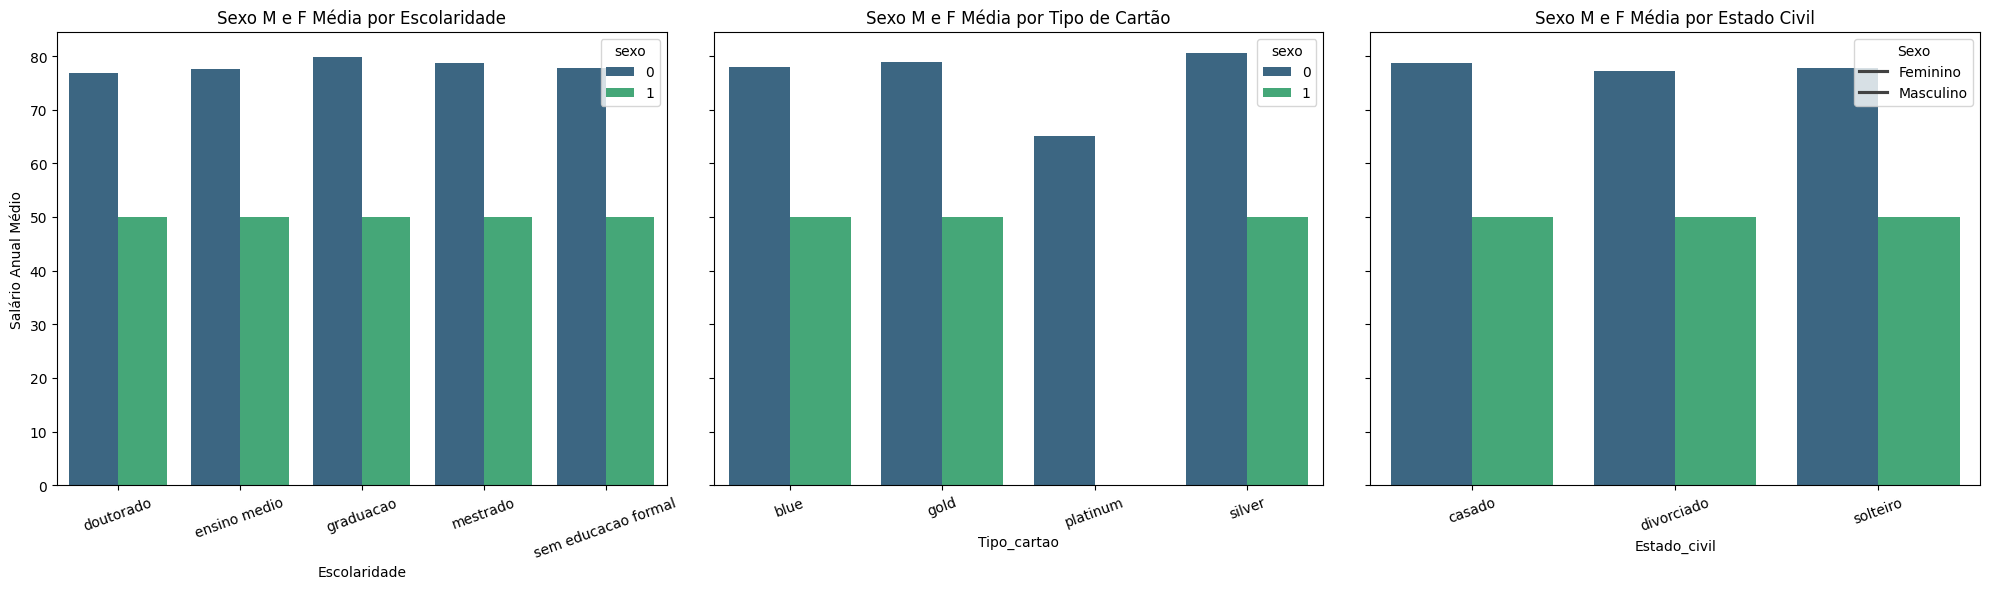

In [46]:
# Definindo as colunas de interesse e os títulos dos gráficos
colunas = ['escolaridade', 'tipo_cartao', 'estado_civil']
titulos = ['Sexo M e F Média por Escolaridade', 'Sexo M e F Média por Tipo de Cartão', 'Sexo M e F Média por Estado Civil']

# Criar a figura e os subplots (3 gráficos lado a lado)
figura, eixos = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Iterar sobre as colunas de interesse
for eixo, coluna in enumerate(colunas):
    # Agrupar por coluna e sexo, e calcular a média do salário anual
    media_salarios = df.groupby(['sexo', coluna])['salario_anual'].mean().reset_index()

    # Criar o gráfico de barras usando o eixo correspondente
    sns.barplot(data=media_salarios, x=coluna, y='salario_anual', hue='sexo', ax=eixos[eixo], palette='viridis')

    # Configurar título e rótulos
    eixos[eixo].set_title(titulos[eixo])
    eixos[eixo].set_xlabel(coluna.capitalize())
    eixos[eixo].set_ylabel('Salário Anual Médio')

    # Ajustar os rótulos do eixo X para melhor visualização
    eixos[eixo].set_xticklabels(eixos[eixo].get_xticklabels(), rotation=20)

# Ajustar a legenda para mostrar "Feminino" e "Masculino"
eixos[eixo].legend(title='Sexo', labels=['Feminino', 'Masculino'])

# Ajustar layout para evitar sobreposição de elementos
plt.tight_layout()

# Exibir a figura com os três gráficos
plt.show()